In [5]:
import pandas as pd 

filename = "./data/1130_alldesc.csv"

descdata = pd.read_csv(filename)

filename = "./data/data.xlsx"

ydata = pd.read_excel(filename)

if len(ydata) != len(descdata):
    print("Error")

print(ydata.head())

FileNotFoundError: [Errno 2] File b'./data/1130_alldesc.csv' does not exist: b'./data/1130_alldesc.csv'

In [4]:
list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol"]

X = []
Y = []
setid = []
for idx, ss in enumerate(ydata["NO"]):
    
    fdesc = descdata[descdata["Unique_ID"] == ss+".mol"]
    
    xval = []
    for d in list_of_desc:
        xval.append(fdesc[d].values[0])

    X.append(xval)
    Y.append(ydata[ydata["NO"] == ss]["LogD"].values[0])
    setid.append(ydata[ydata["NO"] == ss]["DatasetID"].values[0])
    
for idx, y in enumerate(Y):
    print(setid[idx], X[idx], y)

NameError: name 'ydata' is not defined

In [3]:
Xtr = []
Xte = []
Ytr = []
Yte = []
for idx, y in enumerate(Y):
    if setid[idx] == "Tr":
        Xtr.append(X[idx])
        Ytr.append(Y[idx])
    elif setid[idx] == "Te":
        Xte.append(X[idx])
        Yte.append(Y[idx])
        
print("    Test set: ", len(Yte), len(Xte))
print("Training set: ", len(Ytr), len(Xtr))


    Test set:  226 226
Training set:  904 904


   1 2.30814634 0.32614973
   2 1.81274297 0.47077994
   3 1.91548819 0.44078406
   4 2.16533372 0.36784307
   5 2.02979534 0.40741273
   6 1.72560577 0.49621916
   7 1.85191064 0.45934516
   8 1.93160148 0.43607988
   9 1.90660227 0.44337825
  10 1.63311043 0.52322265
  11 1.89264134 0.44745407
  12 1.78859885 0.47782869
  13 1.77983730 0.48038657
  14 1.73835420 0.49249733
  15 1.66793644 0.51305539
  16 1.60278730 0.53207532
  17 1.55756566 0.54527752
  18 1.60286019 0.53205403
  19 1.56893011 0.54195973
  20 1.57543423 0.54006089
  21 1.61802515 0.52762671
  22 1.59421395 0.53457826
  23 1.58941489 0.53597931
  24 1.59006277 0.53579017
  25 1.57111731 0.54132119
  26 1.56721092 0.54246164
  27 1.56549488 0.54296263
  28 1.56497093 0.54311559
  29 1.56495995 0.54311879
Suggested number of components tr:  17


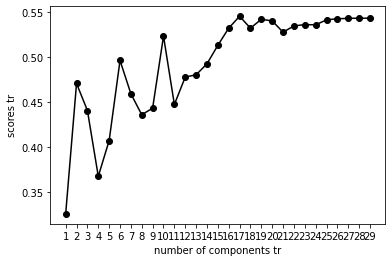

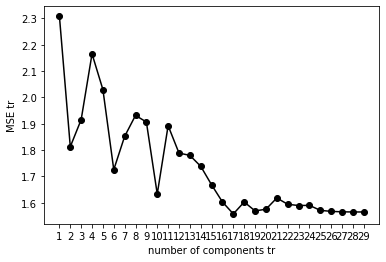

In [4]:
# valutazione del numero di componenti principali ideale da usare per costruire il modello PLS (SENZA il descrittore nmol )
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

trscores = []
trmses = []
trncomps = []
for trncomp in range(1,30):
    pls = PLSRegression(trncomp)
    pls.fit(Xtr, Ytr)
    
    y_cv = cross_val_predict(pls, Xtr, Ytr, cv=5)
    
    trscore = r2_score(Ytr, y_cv)
    trmse = mean_squared_error(Ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()

In [5]:
ncompsugg_senzanmol = 17

pls_17senzanmol = PLSRegression(ncompsugg_senzanmol)
pls_17senzanmol.fit(Xtr, Ytr)
    
y_cv17senzanmol = cross_val_predict(pls_17senzanmol, Xtr, Ytr, cv=5)
    
score17cv = r2_score(Ytr, y_cv17senzanmol)
mse17cv = mean_squared_error(Ytr, y_cv17senzanmol)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncompsugg_senzanmol, mse17cv, score17cv))

comp:   17 MSE: 1.55756566 score: 0.54527752


-0.7400000  0.7928770 -1.5328770
-0.6800000 -0.1953378 -0.4846622
-0.5000000 -0.3597348 -0.1402652
-0.3900000  0.7665811 -1.1565810
-0.3400000  0.5230160 -0.8630160
-0.2100000 -0.2017813 -0.0082187
-0.1900000 -1.0881201  0.8981201
-0.1300000  0.8482387 -0.9782387
-0.0500000  0.0658352 -0.1158352
-0.0400000  0.2696665 -0.3096665
 0.0500000  0.2645273 -0.2145273
 0.2000000  1.2774362 -1.0774362
 0.2100000 -0.1928358  0.4028358
 0.3000000 -1.3302407  1.6302407
 0.3000000  1.0537414 -0.7537414
 0.4000000  1.7670876 -1.3670875
 0.6400000  1.3799767 -0.7399767
 0.6930000  0.1370703  0.5559297
 0.9800000  0.2363836  0.7436165
 1.1000000  1.1614242 -0.0614242
 1.1400000  1.7426548 -0.6026548
 1.2000000 -0.0822424  1.2822424
 1.2200000  2.2957670 -1.0757670
 1.2600000  2.3528541 -1.0928541
-1.9900000 -0.3332331 -1.6567669
 1.3000000  2.3424252 -1.0424252
 1.3000000  1.2905131  0.0094869
 1.5000000  2.4807956 -0.9807956
 1.6700000  0.9782123  0.6917877
 1.6000000  1.0503699  0.5496301
 1.6000000

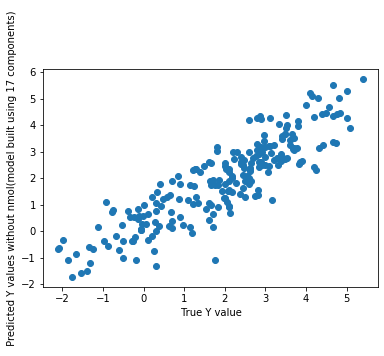

In [6]:

Y_pred17senzanmol = pls_17senzanmol.predict(Xte)


mse_pred17 = mean_squared_error(Yte, Y_pred17senzanmol )

RMSE_pred17 = mean_squared_error(Yte, Y_pred17senzanmol, squared = False )

diff17 = []

for idx, val in enumerate(Yte):
    diff17.append(val-Y_pred17senzanmol[idx])
    
    print("%10.7f %10.7f %10.7f"%(\
                                val, Y_pred17senzanmol[idx], diff17[-1] )) 
                            
    
 
score17 = r2_score(Yte, Y_pred17senzanmol )

print(" score modello a 17 componenti :", score17 )
print(" mse modello a 17 componenti :", mse_pred17)

print(" RMSE modello a 17 componenti :", RMSE_pred17)


plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values without nmol(model built using 17 components) ")

plt.scatter(Yte, Y_pred17senzanmol)

plt.show()

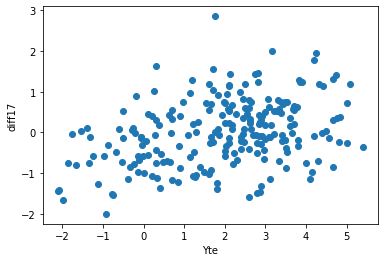

In [7]:
# GRAFICO : RESIDUI ORDINARI modello a 17 vs Yte
plt.xlabel("Yte")
plt.ylabel("diff17")
plt.scatter( Yte, diff17)
plt.show()

In [8]:
logDsenzanmol17 = pls_17senzanmol.predict(X)
diff17tot = []

for idx, val in enumerate(Y):
    diff17tot.append(val-logDsenzanmol17[idx])
    
    print("%10.7f %10.7f %10.7f"%(\
                                val, logDsenzanmol17[idx], diff17tot[-1] )) 


-0.9600000 -1.1918547  0.2318547
-0.9200000 -0.1743614 -0.7456386
-0.9000000 -0.6628008 -0.2371992
-0.8300000 -0.3060019 -0.5239981
-0.8200000 -0.7532656 -0.0667344
-0.7900000 -1.0078663  0.2178663
-0.7800000  0.5984317 -1.3784316
-0.7700000 -0.6277108 -0.1422892
-0.7700000 -0.1544661 -0.6155339
-0.7700000 -0.5262667 -0.2437333
-0.7500000  0.4872118 -1.2372118
-0.7500000 -0.3575120 -0.3924880
-0.7400000  0.7928770 -1.5328770
-0.7300000  0.3165227 -1.0465227
-0.7300000 -0.1170871 -0.6129129
-0.7000000  0.4334798 -1.1334798
-0.6800000 -0.1953378 -0.4846622
-0.6700000 -0.8133918  0.1433918
-0.6600000 -0.5947541 -0.0652459
-0.6400000  0.3782035 -1.0182035
-0.6000000  0.4369398 -1.0369398
-0.5700000 -0.1073916 -0.4626084
-0.5500000  0.0784673 -0.6284674
-0.5200000 -1.0537000  0.5337000
-0.5100000  0.4100423 -0.9200423
-0.5000000 -0.3597348 -0.1402652
-0.5000000 -0.4362935 -0.0637065
-0.3900000  1.0590591 -1.4490591
-0.4800000 -0.3076345 -0.1723655
-0.4700000 -0.3574823 -0.1125177
-0.4600000